### ADVANCED REGRESSION- ASSIGNMENT
- A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
- The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

In [1884]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')


In [1885]:
#### Reading the dataset and storing it in dataframe
house=pd.read_csv("train.csv")

In [1886]:
### Displaying the header of dataframe
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1887]:
##Observing the datatypes and non-null values
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### DATA CLEANING

In [1888]:
### checking the percentage of missing values
house.isnull().sum().sort_values(ascending=False).head(20)/house.shape[0]

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Utilities       0.000000
dtype: float64

In [1889]:
### Check for NA values in PoolQC
house.PoolQC.value_counts(dropna=False,normalize=True)

NaN    0.995205
Gd     0.002055
Ex     0.001370
Fa     0.001370
Name: PoolQC, dtype: float64

In [1890]:
### PoolQC column is highly skewed hence dropping the column
house.drop(columns='PoolQC',axis=1,inplace=True)

In [1891]:
### Check for NA values in MiscFeature column 
house.MiscFeature.value_counts(dropna=False,normalize=True)

NaN     0.963014
Shed    0.033562
Gar2    0.001370
Othr    0.001370
TenC    0.000685
Name: MiscFeature, dtype: float64

In [1892]:
### MiscFeature column is highly skewed hence dropping the column
house.drop(columns='MiscFeature',axis=1,inplace=True)

In [1893]:
### Check for NA values in Alley column 
house.Alley.value_counts(dropna=False,normalize=True)

NaN     0.937671
Grvl    0.034247
Pave    0.028082
Name: Alley, dtype: float64

In [1894]:
### Replacing NA with 'No Alley'
house.Alley=house.Alley.apply(lambda x:'No Alley' if pd.isna(x) else x)

In [1895]:
### Check for NA values in Fence column 
house.Fence.value_counts(dropna=False)

NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [1896]:
### Replacing NA with 'No Fence'
house.Fence=house.Fence.apply(lambda x:'No Fence' if pd.isna(x) else x)

In [1897]:
### FireplaceQu 
house.FireplaceQu.value_counts(dropna=False,normalize=True)

NaN    0.472603
Gd     0.260274
TA     0.214384
Fa     0.022603
Ex     0.016438
Po     0.013699
Name: FireplaceQu, dtype: float64

In [1898]:
### Replacing NA with 'No Fireplace'
house.FireplaceQu=house.FireplaceQu.apply(lambda x:'No Fireplace' if pd.isna(x) else x)

In [1899]:
### FireplaceQu 
house.FireplaceQu.value_counts(dropna=False,normalize=True)

No Fireplace    0.472603
Gd              0.260274
TA              0.214384
Fa              0.022603
Ex              0.016438
Po              0.013699
Name: FireplaceQu, dtype: float64

In [1900]:
## Combining less percentage categories to Other
house.FireplaceQu=house.FireplaceQu.apply(lambda x:'Other' if x=='Fa'or x=='Ex'or x=='Po' else x)

In [1901]:
### FireplaceQu 
house.FireplaceQu.value_counts(dropna=False,normalize=True)

No Fireplace    0.472603
Gd              0.260274
TA              0.214384
Other           0.052740
Name: FireplaceQu, dtype: float64

<AxesSubplot:xlabel='LotFrontage'>

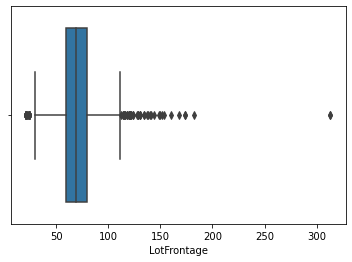

In [1902]:
### Visualiing LotFrontage using boxplot
sns.boxplot(house.LotFrontage)

In [1903]:
## since only 17% of data is missing we replace the missing values with median of LotFrontage
LotFrontage_median=house.LotFrontage.median()

In [1904]:
## since only 17% of data is missing we replace the missing values with median of LotFrontage
house.LotFrontage=house.LotFrontage.apply(lambda x: LotFrontage_median if pd.isna(x) else x)

In [1905]:
cols=['GarageCond','GarageType','GarageFinish','GarageQual']
for i in cols:
    print(house[i].value_counts(dropna=False))

TA     1326
NaN      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64
Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Unf    605
RFn    422
Fin    352
NaN     81
Name: GarageFinish, dtype: int64
TA     1311
NaN      81
Fa       48
Gd       14
Ex        3
Po        3
Name: GarageQual, dtype: int64


In [1906]:
### Replacing missing values with 'No Garage'
for i in cols:
    house[i]=house[i].apply(lambda x:'No Garage' if pd.isna(x) else x)

In [1907]:
cols=['GarageCond','GarageType','GarageFinish','GarageQual']
for i in cols:
    print(house[i].value_counts(dropna=False))

TA           1326
No Garage      81
Fa             35
Gd              9
Po              7
Ex              2
Name: GarageCond, dtype: int64
Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64
Unf          605
RFn          422
Fin          352
No Garage     81
Name: GarageFinish, dtype: int64
TA           1311
No Garage      81
Fa             48
Gd             14
Ex              3
Po              3
Name: GarageQual, dtype: int64


In [1908]:
### GarageCond
house.GarageCond.value_counts()

TA           1326
No Garage      81
Fa             35
Gd              9
Po              7
Ex              2
Name: GarageCond, dtype: int64

In [1909]:
### Replacing small % values with 'Other'
house.GarageCond=house.GarageCond.apply(lambda x:'Other' if x=='Gd' or x=='Po' or x=='Ex'else x)

In [1910]:
house.GarageType.value_counts()

Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64

In [1911]:
### Replacing small % values with 'Other'
house.GarageType=house.GarageType.apply(lambda x:'Other' if x=='Basment' or x=='CarPort' or x=='2Types'else x)

In [1912]:
house.GarageQual.value_counts()

TA           1311
No Garage      81
Fa             48
Gd             14
Ex              3
Po              3
Name: GarageQual, dtype: int64

In [1913]:
### Replacing small % values with 'Other'
house.GarageQual=house.GarageQual.apply(lambda x:'Other' if x=='Gd' or x=='Ex' or x=='Po'else x)

In [1914]:
## Checking for garage built year
house.GarageYrBlt.value_counts(dropna=False)

NaN       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1906.0     1
1927.0     1
1900.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 98, dtype: int64

In [1915]:
## Dropping GarageYrBlt column as we take year built as the base age of the house
house.drop(columns='GarageYrBlt',axis=1,inplace=True)

In [1916]:
col=['BsmtCond','BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2']

for i in col:
    print(house[i].value_counts(dropna=False))
    ## Replacing missing values with 'No basement'
    house[i]=house[i].apply(lambda x:'No Basement' if pd.isna(x) else x)

TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64
TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64
No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64
Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


In [1917]:
## Replacing categories of NaN
for i in col:
    print(house[i].value_counts(dropna=False))

TA             1311
Gd               65
Fa               45
No Basement      37
Po                2
Name: BsmtCond, dtype: int64
TA             649
Gd             618
Ex             121
No Basement     37
Fa              35
Name: BsmtQual, dtype: int64
No             953
Av             221
Gd             134
Mn             114
No Basement     38
Name: BsmtExposure, dtype: int64
Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No Basement     37
Name: BsmtFinType1, dtype: int64
Unf            1256
Rec              54
LwQ              46
No Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64


In [1918]:
house.BsmtCond.value_counts()

TA             1311
Gd               65
Fa               45
No Basement      37
Po                2
Name: BsmtCond, dtype: int64

In [1919]:
### Replacing small % values with 'Other'
house.BsmtCond=house.BsmtCond.apply(lambda x:'Other' if x=='No Basement' or x=='Po' else x)

In [1920]:
### Replacing small % values with 'Other'
house.BsmtQual=house.BsmtQual.apply(lambda x:'Other' if x=='No Basement' or x=='Fa' else x)
house.BsmtFinType1=house.BsmtFinType1.apply(lambda x:'Other' if x=='No Basement' or x=='LwQ' else x)
house.BsmtFinType2=house.BsmtFinType2.apply(lambda x:'Other' if x=='No Basement' or x=='BLQ' or x=='ALQ' or x=='GLQ' else x)

In [1921]:
##Viewing the values
var=['MasVnrArea','MasVnrType']
col=['Electrical']
for i in var:
    print(house[i].value_counts(dropna=False))

0.0      861
72.0       8
180.0      8
NaN        8
108.0      8
        ... 
337.0      1
415.0      1
293.0      1
259.0      1
621.0      1
Name: MasVnrArea, Length: 328, dtype: int64
None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64


<AxesSubplot:xlabel='MasVnrArea'>

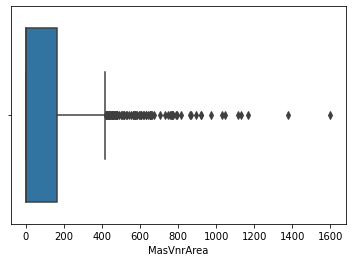

In [1922]:
## seeing the spread of data
sns.boxplot(house.MasVnrArea)

In [1923]:
## Choosing median to impute missing values
MasVnrArea_median=house.MasVnrArea.median()
house.MasVnrArea=house.MasVnrArea.apply(lambda x:MasVnrArea_median if pd.isna(x) else x)

In [1924]:
house.MasVnrArea.value_counts(dropna=False)

0.0      869
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [1925]:
house.MasVnrType.value_counts(dropna=False)

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [1926]:
### Replacing missing values with 'None' for MasVnrType
house.MasVnrType=house.MasVnrType.apply(lambda x:'None' if pd.isna(x) else x)

In [1927]:
house['Electrical'].value_counts(dropna=False)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [1928]:
### Replacing small % values with 'Other'
house.Electrical=house.Electrical.apply(lambda x:'Other' if x=='FuseF' or x=='FuseP' or x=='Mix' or pd.isna(x) else x)

In [1929]:
## Checking for null values
house.isnull().sum().sort_values(ascending=False)

SalePrice       0
ExterCond       0
RoofStyle       0
RoofMatl        0
Exterior1st     0
               ..
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional      0
Id              0
Length: 78, dtype: int64

In [1930]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [1931]:
## Dropping the redundant year columns
house.drop(columns=['YrSold','YearRemodAdd'],axis=1,inplace=True)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

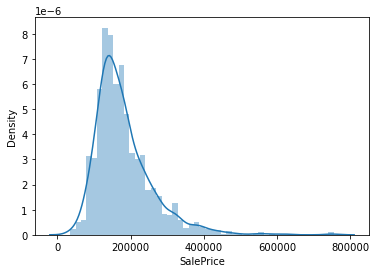

In [1932]:
### Checking if the targe variable is normally distributed
sns.distplot(house.SalePrice)

In [1933]:
### Since the target variable is skewed we take log unction of it to remove the skewness
house.SalePrice=np.log(house.SalePrice)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

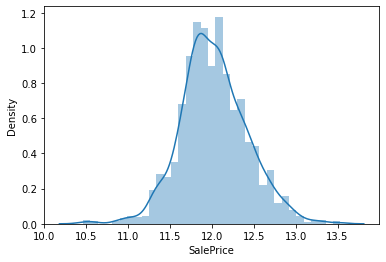

In [1934]:
## Now the target variable is normally distributed
sns.distplot(house.SalePrice)

In [1935]:
##Converting YearBuilt column into Age of house(from the current year) for generalising the year field
house.YearBuilt=2022-house.YearBuilt

In [1936]:
house.YearBuilt

0        19
1        46
2        21
3       107
4        22
       ... 
1455     23
1456     44
1457     81
1458     72
1459     57
Name: YearBuilt, Length: 1460, dtype: int64

In [1937]:
### Assigning to a new dataframe df
df=house

### DUMMY VARIABLE CREATION

In [1938]:
## Identifying categorical columns
cat_cols=df.select_dtypes(include='object').columns
cat_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [1939]:
for col in df[cat_cols]:
    print(col)
    print(df[col].value_counts())
    

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Street
Pave    1454
Grvl       6
Name: Street, dtype: int64
Alley
No Alley    1369
Grvl          50
Pave          41
Name: Alley, dtype: int64
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
M

In [1940]:
df.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [1941]:
### Replacing small % values with 'Other'
df.Neighborhood=df.Neighborhood.apply(lambda x:'Other' if x=='Blueste' or x=='NPkVill' or x=='Veenker' or x=='Blmngtn' or x=='BrDale' or x=='MeadowV' or x=='SWISU' or x=='StoneBr' or x=='ClearCr' or x=='IDOTRR' or x=='Timber' or x=='NoRidge' or x=='Mitchel' or x=='Crawfor' or x=='BrkSide' or x=='SawyerW' or x=='NWAmes' or x=='Sawyer' or x=='NridgHt' or x=='Gilbert' else x)

In [1942]:
df.SaleType.value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [1943]:
### Replacing small % values with 'Other'
df.SaleType=df.SaleType.apply(lambda x:'Other' if x=='ConLD' or x=='ConLI' or x=='ConLw' or x=='CWD' or x=='Oth' or x=='Con'  else x)

In [1944]:
df.Functional.value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [1945]:
### Replacing small % values with 'Other'
df.Functional=df.Functional.apply(lambda x:'Other' if x=='Mod' or x=='Maj1' or x=='Maj2' or x=='Sev' else x)

In [1946]:
df.Exterior1st.value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
CBlock       1
AsphShn      1
ImStucc      1
Name: Exterior1st, dtype: int64

In [1947]:
### Replacing small % values with 'Other'
df.Exterior1st=df.Exterior1st.apply(lambda x:'Other' if x=='BrkComm' or x=='ImStucc' or x=='Stone' or x=='CBlock' or x=='AsphShn' or x=='ImStuccor' or x=='Stucco' or x=='WdShing'or  x=='BrkFace' or x=='CemntBd' else x)

In [1948]:
df.Exterior2nd.value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [1949]:
### Replacing small % values with 'Other'
df.Exterior2nd=df.Exterior2nd.apply(lambda x:'Other' if x=='BrkComm' or x=='ImStucc' or x=='Brk Cmn' or x=='CBlock' or x=='AsphShn' or x=='ImStuccor' or x=='Stucco' or x=='Wd Shng'or  x=='AsbShng' or x=='CmentBd' else x)

In [1950]:
df.RoofMatl.value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Membran       1
Roll          1
Metal         1
ClyTile       1
Name: RoofMatl, dtype: int64

In [1951]:
### Replacing small % values with 'Other'
df.RoofMatl=df.RoofMatl.apply(lambda x:'Other' if x=='Tar&Grv' or x=='WdShngl' or x=='WdShake' or x=='Membran' or x=='Roll' or x=='Metal' or x=='ClyTile' else x)

In [1952]:
df.Condition2.value_counts()

Norm      1445
Feedr        6
RRNn         2
Artery       2
PosN         2
RRAe         1
RRAn         1
PosA         1
Name: Condition2, dtype: int64

In [1953]:
### Replacing small % values with 'Other'
df.Condition2=df.Condition2.apply(lambda x:'Other' if x=='Feedr' or x=='RRNn' or x=='Artery' or x=='PosN' or x=='RRAe' or x=='RRAn' or x=='PosA' else x)

In [1954]:
df.Condition1.value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [1955]:
### Replacing small % values with 'Other'
df.Condition1=df.Condition1.apply(lambda x:'Other' if x=='PosN' or x=='RRNn' or x=='RRNe' or x=='PosN' or x=='RRAe' or x=='RRAn' or x=='PosA' else x)

In [1956]:
for col in df[cat_cols]:
    df=pd.concat([df,pd.get_dummies(df[col],drop_first=True,prefix=col)],axis=1)

In [1957]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence_MnWw,Fence_No Fence,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,...,0,1,0,0,1,0,0,0,1,0
1,2,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,...,0,1,0,0,1,0,0,0,1,0
2,3,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,...,0,1,0,0,1,0,0,0,1,0
3,4,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,...,0,1,0,0,1,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,No Alley,Reg,Lvl,AllPub,...,0,1,0,0,1,0,0,0,1,0
1456,1457,20,RL,85.0,13175,Pave,No Alley,Reg,Lvl,AllPub,...,0,0,0,0,1,0,0,0,1,0
1457,1458,70,RL,66.0,9042,Pave,No Alley,Reg,Lvl,AllPub,...,0,0,0,0,1,0,0,0,1,0
1458,1459,20,RL,68.0,9717,Pave,No Alley,Reg,Lvl,AllPub,...,0,1,0,0,1,0,0,0,1,0


In [1958]:
## Dropping the categorical columns
df.drop(columns=cat_cols,axis=1,inplace=True)

In [1959]:
df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'Fence_MnWw', 'Fence_No Fence', 'SaleType_New', 'SaleType_Other',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=175)

### PLOTS FOR VISUALIZATION

In [1960]:
df.select_dtypes(include=['int64','float64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice'],
      dtype='object')

Column : Id
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 0, 'Id')
Text(0, 0.5, 'SalePrice')


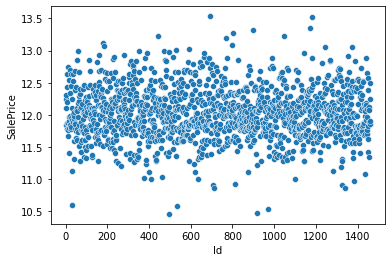

None
Column : MSSubClass
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 0, 'MSSubClass')
Text(0, 0.5, 'SalePrice')


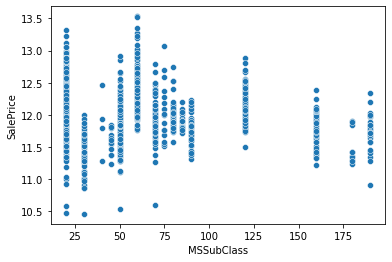

None
Column : LotFrontage
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 0, 'LotFrontage')
Text(0, 0.5, 'SalePrice')


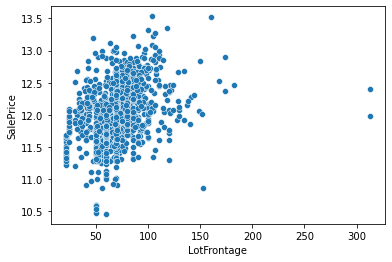

None
Column : LotArea
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 0, 'LotArea')
Text(0, 0.5, 'SalePrice')


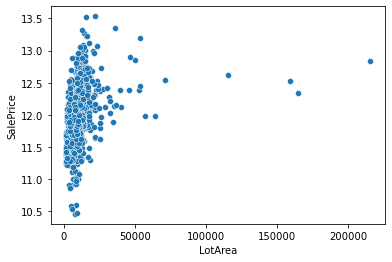

None
Column : OverallQual
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 0, 'OverallQual')
Text(0, 0.5, 'SalePrice')


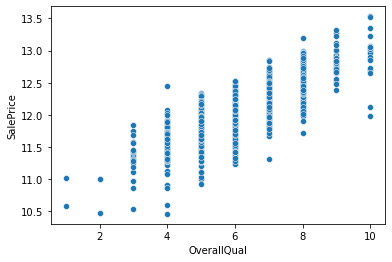

None
Column : OverallCond
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 0, 'OverallCond')
Text(0, 0.5, 'SalePrice')


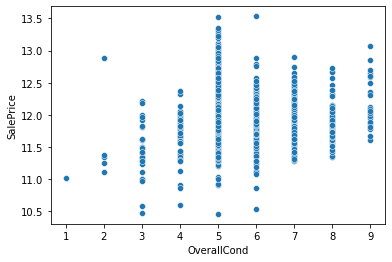

None
Column : YearBuilt
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 0, 'YearBuilt')
Text(0, 0.5, 'SalePrice')


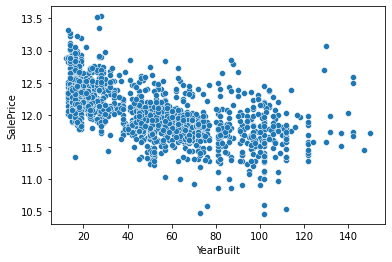

None
Column : MasVnrArea
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 0, 'MasVnrArea')
Text(0, 0.5, 'SalePrice')


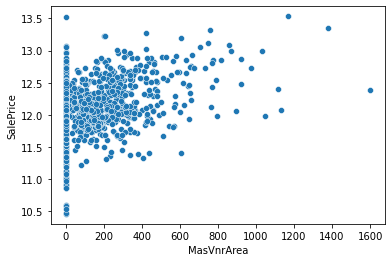

None
Column : BsmtFinSF1
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 0, 'BsmtFinSF1')
Text(0, 0.5, 'SalePrice')


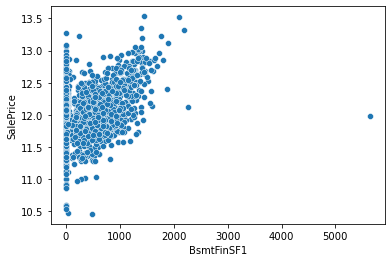

None
Column : BsmtFinSF2
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 0, 'BsmtFinSF2')
Text(0, 0.5, 'SalePrice')


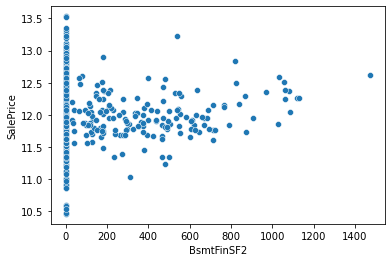

None
Column : BsmtUnfSF
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 0, 'BsmtUnfSF')
Text(0, 0.5, 'SalePrice')


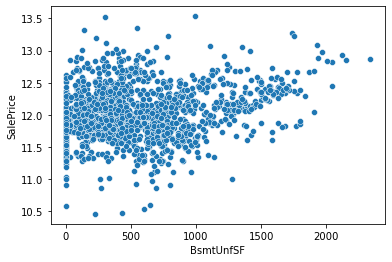

None
Column : TotalBsmtSF
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 0, 'TotalBsmtSF')
Text(0, 0.5, 'SalePrice')


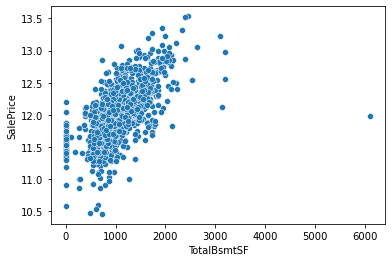

None
Column : 1stFlrSF
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 0, '1stFlrSF')
Text(0, 0.5, 'SalePrice')


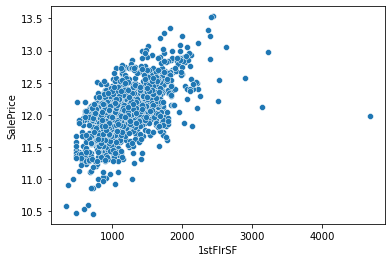

None
Column : 2ndFlrSF
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 0, '2ndFlrSF')
Text(0, 0.5, 'SalePrice')


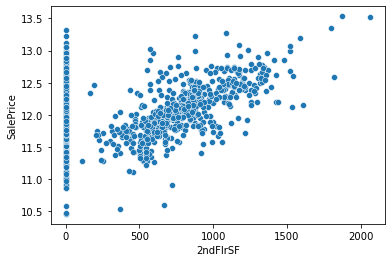

None
Column : LowQualFinSF
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 0, 'LowQualFinSF')
Text(0, 0.5, 'SalePrice')


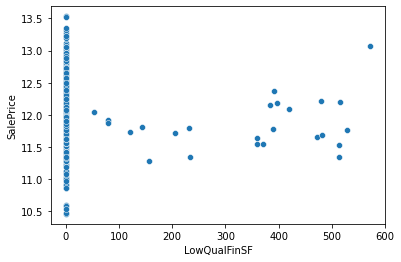

None
Column : GrLivArea
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 0, 'GrLivArea')
Text(0, 0.5, 'SalePrice')


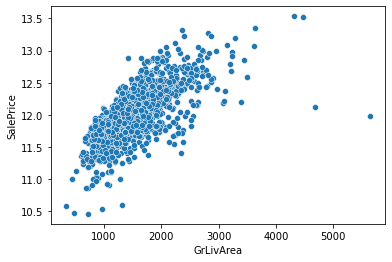

None
Column : BsmtFullBath
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 0, 'BsmtFullBath')
Text(0, 0.5, 'SalePrice')


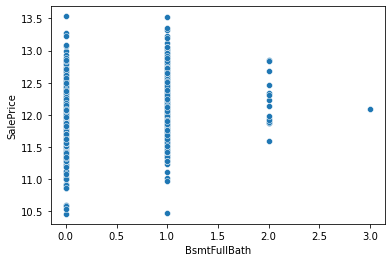

None
Column : BsmtHalfBath
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 0, 'BsmtHalfBath')
Text(0, 0.5, 'SalePrice')


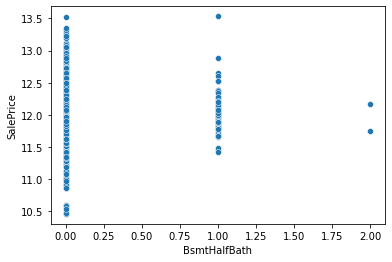

None
Column : FullBath
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 0, 'FullBath')
Text(0, 0.5, 'SalePrice')


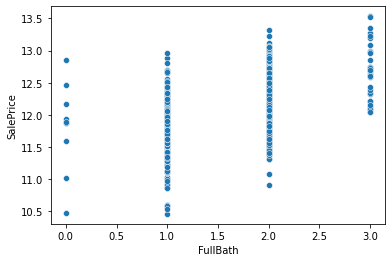

None
Column : HalfBath
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 0, 'HalfBath')
Text(0, 0.5, 'SalePrice')


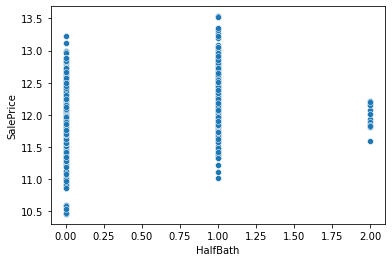

None
Column : BedroomAbvGr
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 0, 'BedroomAbvGr')
Text(0, 0.5, 'SalePrice')


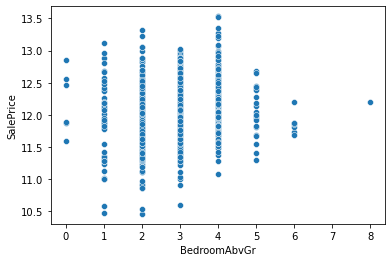

None
Column : KitchenAbvGr
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 0, 'KitchenAbvGr')
Text(0, 0.5, 'SalePrice')


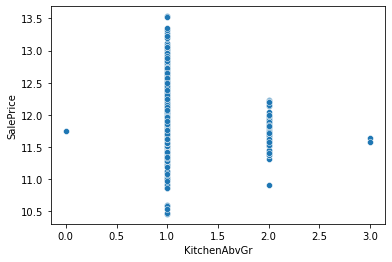

None
Column : TotRmsAbvGrd
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 0, 'TotRmsAbvGrd')
Text(0, 0.5, 'SalePrice')


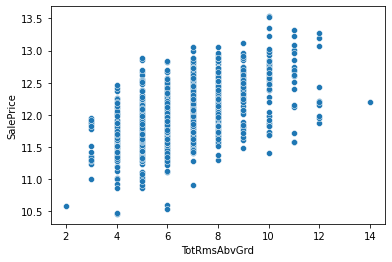

None
Column : Fireplaces
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 0, 'Fireplaces')
Text(0, 0.5, 'SalePrice')


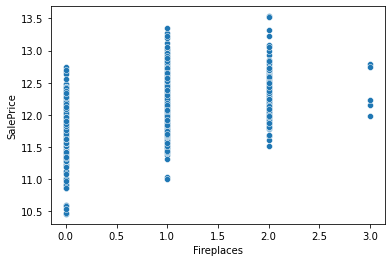

None
Column : GarageCars
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 0, 'GarageCars')
Text(0, 0.5, 'SalePrice')


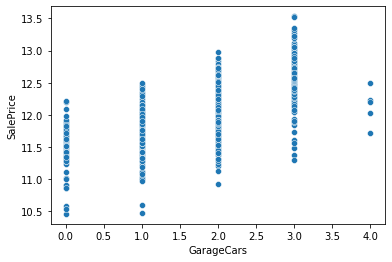

None
Column : GarageArea
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 0, 'GarageArea')
Text(0, 0.5, 'SalePrice')


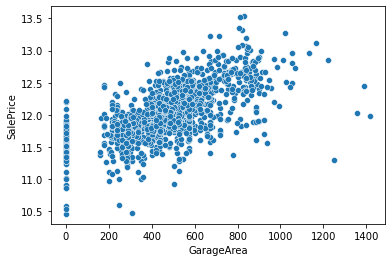

None
Column : WoodDeckSF
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 0, 'WoodDeckSF')
Text(0, 0.5, 'SalePrice')


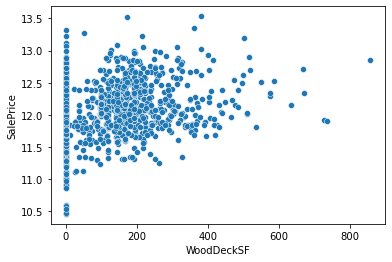

None
Column : OpenPorchSF
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 0, 'OpenPorchSF')
Text(0, 0.5, 'SalePrice')


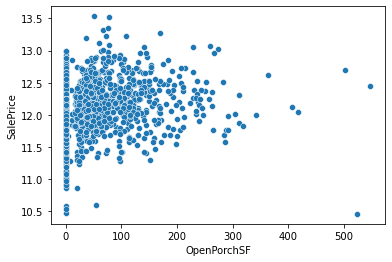

None
Column : EnclosedPorch
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 0, 'EnclosedPorch')
Text(0, 0.5, 'SalePrice')


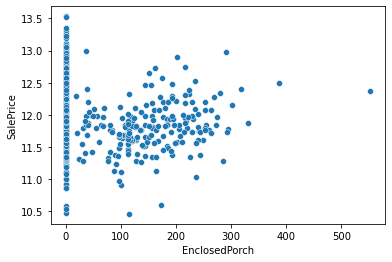

None
Column : 3SsnPorch
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 0, '3SsnPorch')
Text(0, 0.5, 'SalePrice')


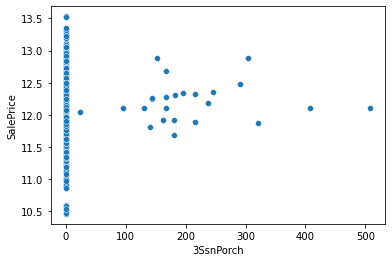

None
Column : ScreenPorch
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 0, 'ScreenPorch')
Text(0, 0.5, 'SalePrice')


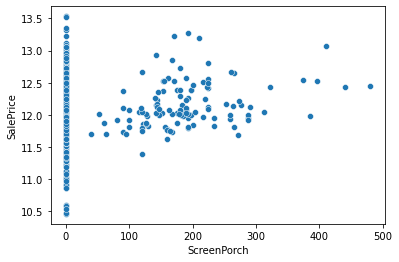

None
Column : PoolArea
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 0, 'PoolArea')
Text(0, 0.5, 'SalePrice')


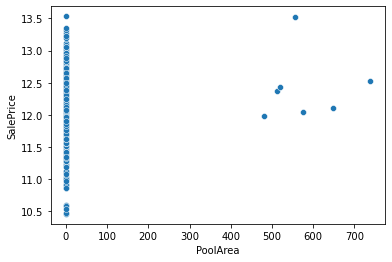

None
Column : MiscVal
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 0, 'MiscVal')
Text(0, 0.5, 'SalePrice')


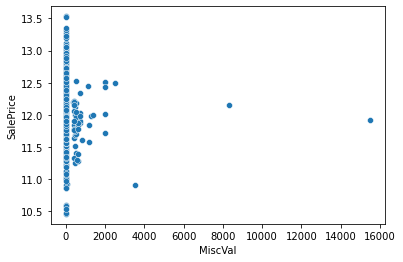

None
Column : MoSold
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 0, 'MoSold')
Text(0, 0.5, 'SalePrice')


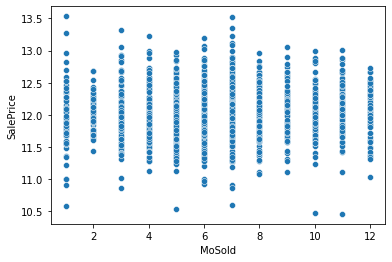

None
Column : SalePrice
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 0, 'SalePrice')
Text(0, 0.5, 'SalePrice')


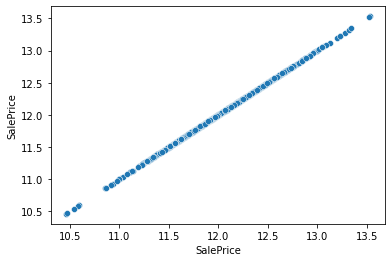

None


In [1961]:
### Plotting numerical variables against salesprice
for i in df.select_dtypes(include=['int64','float64']).columns:
    print('Column :',i)
    print(sns.scatterplot(x=df[i],y=df['SalePrice']))
    print(plt.xlabel(i))
    print(plt.ylabel('SalePrice'))
    print(plt.show())
    

Id
AxesSubplot(0.125,0.125;0.775x0.755)


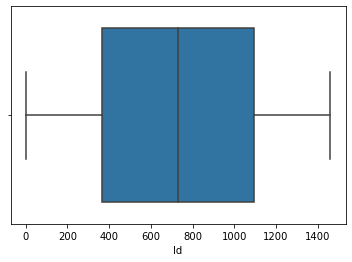

None
MSSubClass
AxesSubplot(0.125,0.125;0.775x0.755)


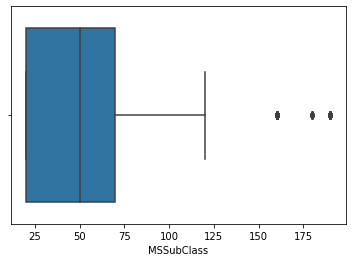

None
LotFrontage
AxesSubplot(0.125,0.125;0.775x0.755)


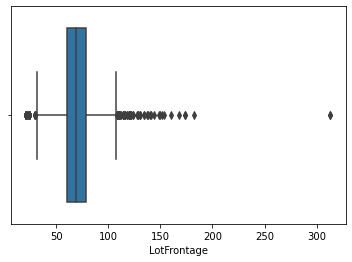

None
LotArea
AxesSubplot(0.125,0.125;0.775x0.755)


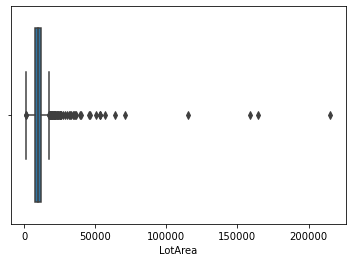

None
OverallQual
AxesSubplot(0.125,0.125;0.775x0.755)


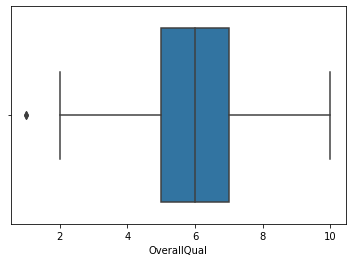

None
OverallCond
AxesSubplot(0.125,0.125;0.775x0.755)


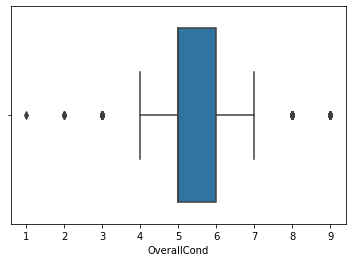

None
YearBuilt
AxesSubplot(0.125,0.125;0.775x0.755)


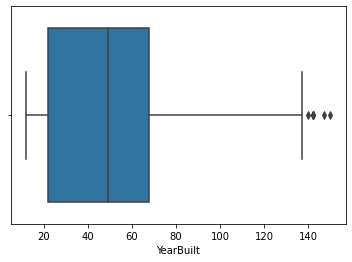

None
MasVnrArea
AxesSubplot(0.125,0.125;0.775x0.755)


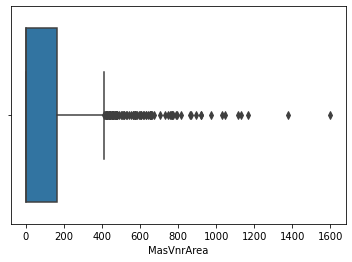

None
BsmtFinSF1
AxesSubplot(0.125,0.125;0.775x0.755)


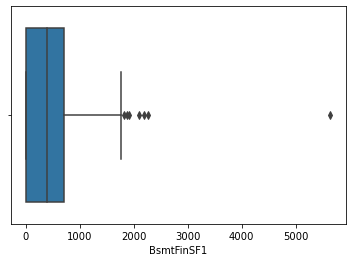

None
BsmtFinSF2
AxesSubplot(0.125,0.125;0.775x0.755)


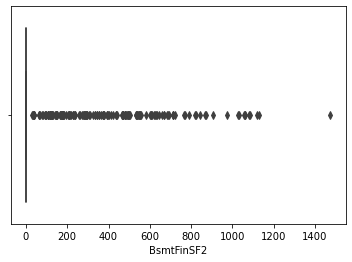

None
BsmtUnfSF
AxesSubplot(0.125,0.125;0.775x0.755)


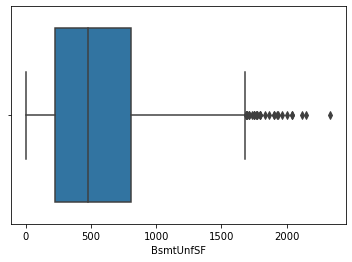

None
TotalBsmtSF
AxesSubplot(0.125,0.125;0.775x0.755)


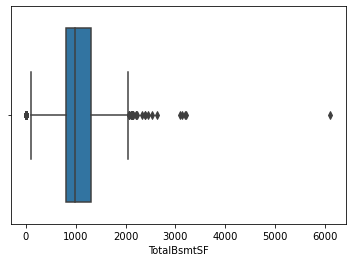

None
1stFlrSF
AxesSubplot(0.125,0.125;0.775x0.755)


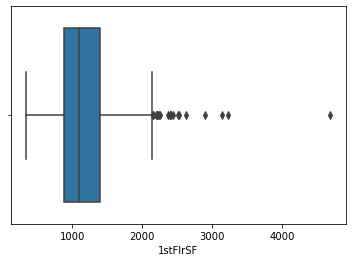

None
2ndFlrSF
AxesSubplot(0.125,0.125;0.775x0.755)


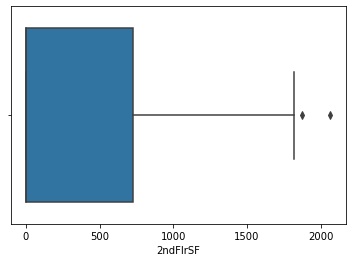

None
LowQualFinSF
AxesSubplot(0.125,0.125;0.775x0.755)


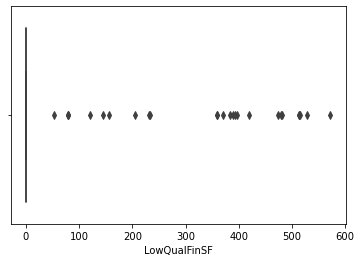

None
GrLivArea
AxesSubplot(0.125,0.125;0.775x0.755)


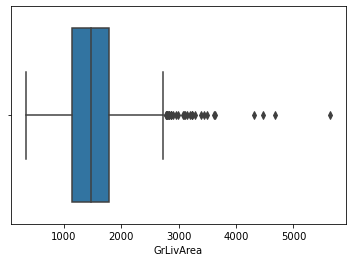

None
BsmtFullBath
AxesSubplot(0.125,0.125;0.775x0.755)


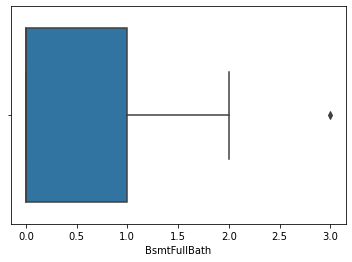

None
BsmtHalfBath
AxesSubplot(0.125,0.125;0.775x0.755)


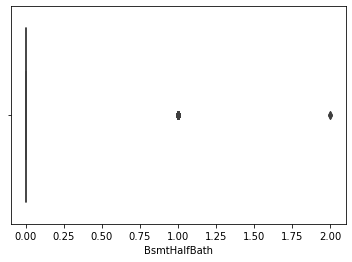

None
FullBath
AxesSubplot(0.125,0.125;0.775x0.755)


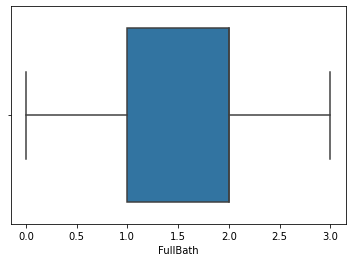

None
HalfBath
AxesSubplot(0.125,0.125;0.775x0.755)


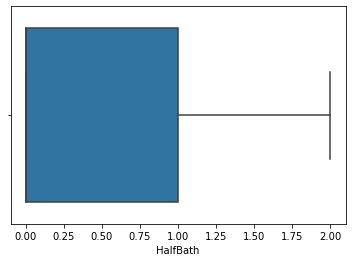

None
BedroomAbvGr
AxesSubplot(0.125,0.125;0.775x0.755)


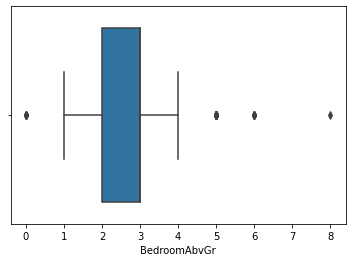

None
KitchenAbvGr
AxesSubplot(0.125,0.125;0.775x0.755)


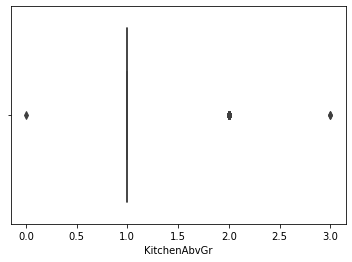

None
TotRmsAbvGrd
AxesSubplot(0.125,0.125;0.775x0.755)


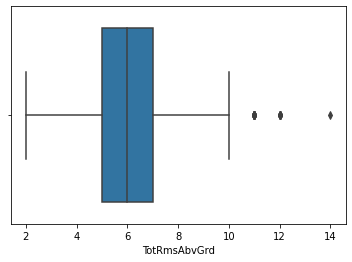

None
Fireplaces
AxesSubplot(0.125,0.125;0.775x0.755)


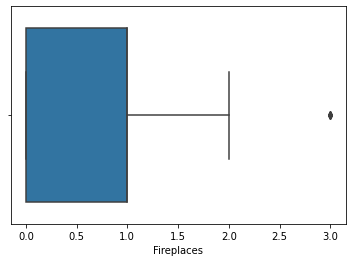

None
GarageCars
AxesSubplot(0.125,0.125;0.775x0.755)


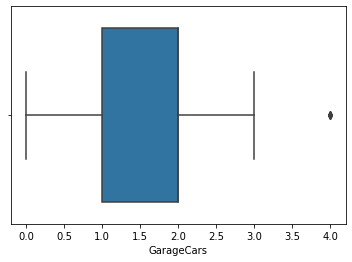

None
GarageArea
AxesSubplot(0.125,0.125;0.775x0.755)


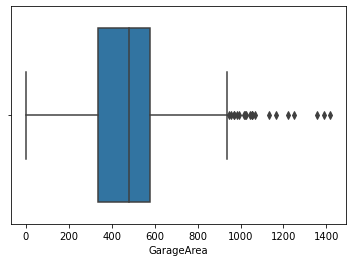

None
WoodDeckSF
AxesSubplot(0.125,0.125;0.775x0.755)


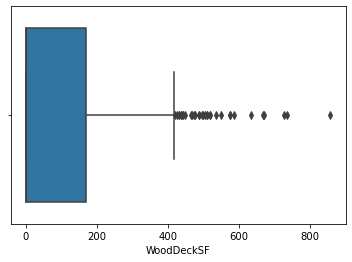

None
OpenPorchSF
AxesSubplot(0.125,0.125;0.775x0.755)


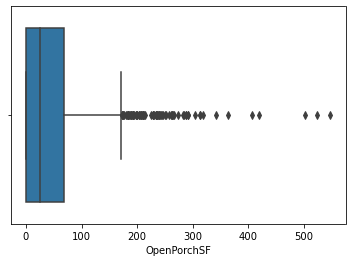

None
EnclosedPorch
AxesSubplot(0.125,0.125;0.775x0.755)


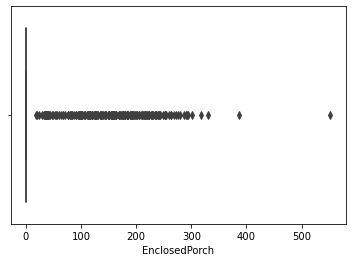

None
3SsnPorch
AxesSubplot(0.125,0.125;0.775x0.755)


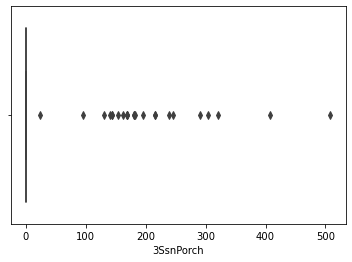

None
ScreenPorch
AxesSubplot(0.125,0.125;0.775x0.755)


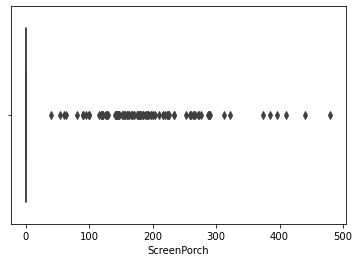

None
PoolArea
AxesSubplot(0.125,0.125;0.775x0.755)


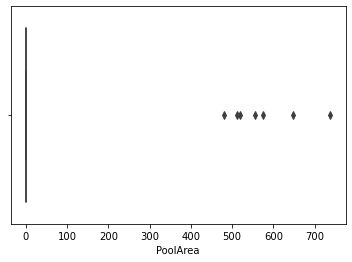

None
MiscVal
AxesSubplot(0.125,0.125;0.775x0.755)


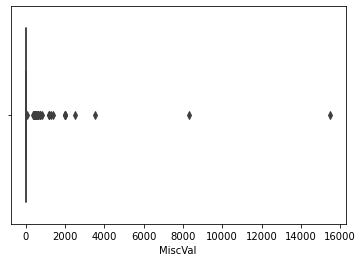

None
MoSold
AxesSubplot(0.125,0.125;0.775x0.755)


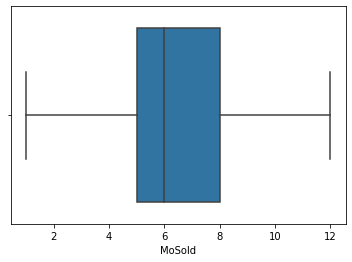

None
SalePrice
AxesSubplot(0.125,0.125;0.775x0.755)


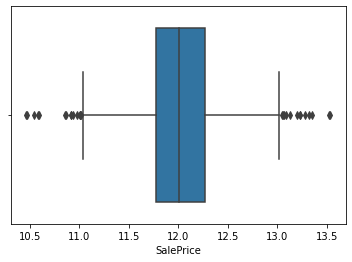

None


In [1962]:
### Plotting boxplot for viewing the distribution

for i in df.select_dtypes(include=['int64','float64']).columns:
    print(i)
    print(sns.boxplot(data=df,x=df[i]))
    print(plt.show())

<AxesSubplot:>

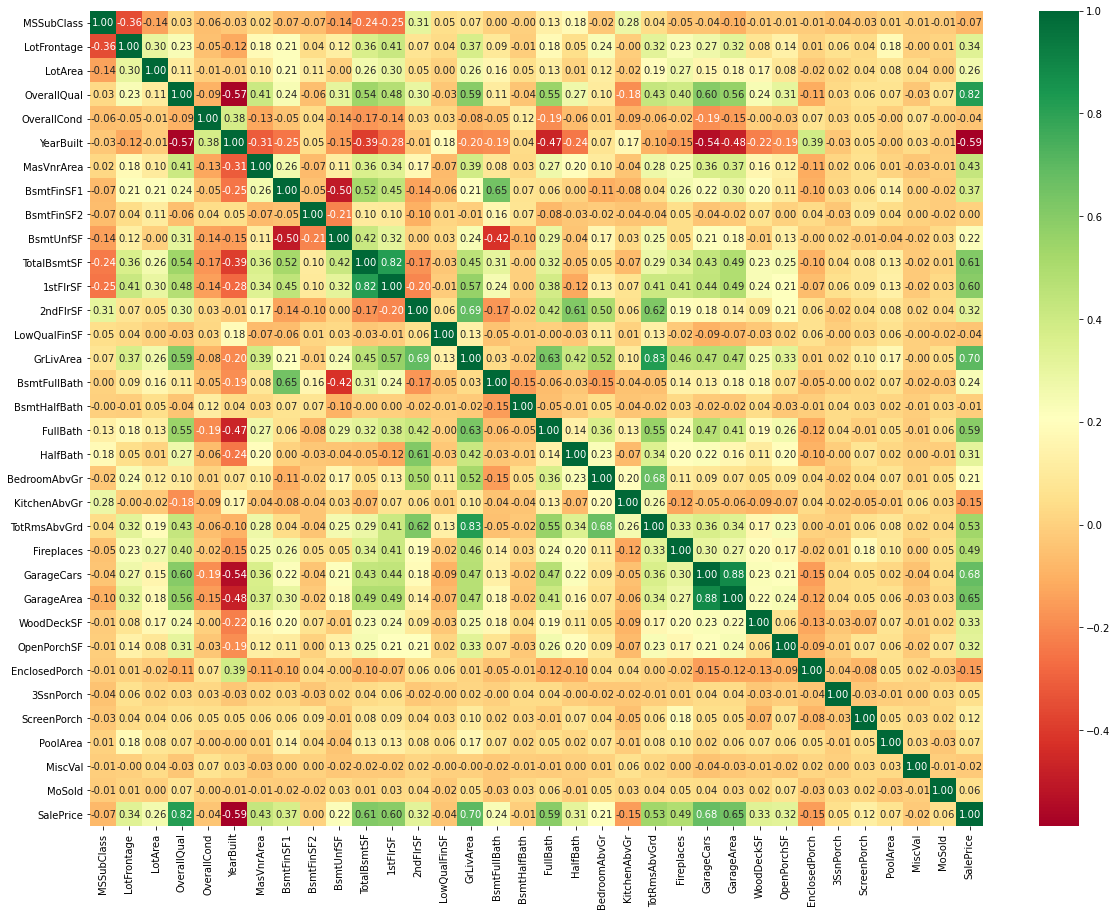

In [1963]:
### Heatmap to visualize the correlation
plt.figure(figsize=(20,15))
sns.heatmap(df[[ 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice']].corr(),annot=True,cmap='RdYlGn',fmt='.2f')

### TRAIN TEST SPLIT

In [1964]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [1965]:
train,test=train_test_split(df,train_size=0.7,random_state=100)

In [1966]:
train.shape,test.shape

((1021, 175), (439, 175))

In [1967]:
train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Fence_MnWw,Fence_No Fence,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
318,319,60,90.0,9900,7,5,29,256.0,987,0,...,0,1,0,0,1,0,0,0,1,0
239,240,50,52.0,8741,6,4,77,0.0,94,0,...,0,0,0,0,1,0,0,0,1,0
986,987,50,59.0,5310,6,8,112,0.0,0,0,...,0,1,0,0,1,0,0,0,1,0
1416,1417,190,60.0,11340,4,6,137,0.0,0,0,...,0,1,0,0,1,0,0,0,1,0
390,391,50,50.0,8405,5,8,122,0.0,241,391,...,0,0,0,0,1,0,0,0,1,0


In [1968]:
train.select_dtypes(include=['int64','float64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice'],
      dtype='object')

In [1969]:
scaler=StandardScaler()

In [1970]:
train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice']]=scaler.fit_transform(train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice']])

In [1971]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Fence_MnWw,Fence_No Fence,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1021.000000,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,736.117532,-2.005483e-16,-2.370506e-17,-9.108912e-17,-2.217184e-16,1.241797e-16,1.297254e-16,-9.416779e-17,-1.090650e-16,2.084523e-16,...,0.006856,0.818805,0.078355,0.020568,0.870715,0.002938,0.007835,0.013712,0.825661,0.078355
std,424.674355,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,...,0.082557,0.385368,0.268860,0.142003,0.335680,0.054153,0.088214,0.116350,0.379587,0.268860
min,1.000000,-8.889529e-01,-2.199712e+00,-8.747892e-01,-3.640619e+00,-4.196464e+00,-1.276266e+00,-5.580245e-01,-9.640305e-01,-2.933126e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,372.000000,-8.889529e-01,-4.333861e-01,-2.951529e-01,-7.813329e-01,-5.320725e-01,-9.463001e-01,-5.580245e-01,-9.640305e-01,-2.933126e-01,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,740.000000,-1.957597e-01,-2.577250e-02,-9.559968e-02,-6.651132e-02,-5.320725e-01,-5.539286e-02,-5.580245e-01,-1.208154e-01,-2.933126e-01,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1108.000000,2.663690e-01,3.818411e-01,9.919770e-02,6.483103e-01,3.840254e-01,5.715419e-01,2.857702e-01,5.675235e-01,-2.933126e-01,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1460.000000,3.039142e+00,1.102509e+01,1.987332e+01,2.792775e+00,3.132319e+00,3.277260e+00,7.986733e+00,1.117655e+01,8.338494e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1972]:
### Assigning X any y for train data
y_train=train['SalePrice']
X_train=train.drop(columns=['SalePrice','Id'],axis=1)

In [1973]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Fence_MnWw,Fence_No Fence,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
318,0.035305,0.925326,-0.057261,0.648310,-0.532073,-0.715324,0.809137,1.159065,-0.293313,-0.454262,...,0,1,0,0,1,0,0,0,1,0
239,-0.195760,-0.795709,-0.169753,-0.066511,-1.448170,0.868511,-0.558025,-0.761831,-0.293313,0.172244,...,0,0,0,0,1,0,0,0,1,0
986,-0.195760,-0.478677,-0.502762,-0.066511,2.216221,2.023391,-0.558025,-0.964030,-0.293313,-0.175567,...,0,1,0,0,1,0,0,0,1,0
1416,3.039142,-0.433386,0.082504,-1.496155,0.384025,2.848305,-0.558025,-0.964030,-0.293313,0.475464,...,0,1,0,0,1,0,0,0,1,0
390,-0.195760,-0.886290,-0.202365,-0.781333,2.216221,2.353356,-0.558025,-0.445625,1.996400,-0.746334,...,0,0,0,0,1,0,0,0,1,0


### RFE - Feature Selection

In [1974]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1975]:
lr=LinearRegression()

In [1976]:
rfe=RFE(lr)

In [1977]:
## Fitting rfe
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression())

In [1978]:
### Obtaining top 50 features
feature_rank=pd.DataFrame(list(zip(X_train.columns,rfe.ranking_,rfe.support_))).sort_values(by=1).head(50)

In [1979]:
top_50=list(feature_rank[0])

In [1980]:
##Assigning top 50 features for modelling
top_50

['SaleCondition_Partial',
 'Condition2_Other',
 'Condition1_Other',
 'Condition1_Norm',
 'Condition1_Feedr',
 'Heating_GasA',
 'Heating_GasW',
 'Heating_Grav',
 'Heating_OthW',
 'Neighborhood_Edwards',
 'LandSlope_Sev',
 'LandSlope_Mod',
 'Heating_Wall',
 'LotConfig_FR3',
 'LotConfig_FR2',
 'LotConfig_CulDSac',
 'Utilities_NoSeWa',
 'LandContour_Lvl',
 'BsmtFinType2_Unf',
 'BsmtFinType1_Unf',
 'BsmtFinType1_Rec',
 'BsmtFinType1_Other',
 'Exterior2nd_Other',
 'Exterior2nd_Stone',
 'ExterCond_Fa',
 'ExterCond_Gd',
 'Exterior1st_HdBoard',
 'RoofMatl_Other',
 'ExterCond_Po',
 'ExterCond_TA',
 'LandContour_Low',
 'RoofStyle_Hip',
 'RoofStyle_Gable',
 'Foundation_PConc',
 'BsmtQual_Gd',
 'BsmtQual_Other',
 'BsmtQual_TA',
 'BsmtCond_Gd',
 'BsmtCond_TA',
 'BsmtExposure_Gd',
 'Foundation_CBlock',
 'LandContour_HLS',
 'HeatingQC_Fa',
 'LotShape_IR3',
 'GarageQual_TA',
 'GarageCond_No Garage',
 'PavedDrive_P',
 'Fence_GdWo',
 'GrLivArea',
 'LowQualFinSF']

In [1981]:
X_train.columns[rfe.support_]

Index(['OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'GarageCars', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Alley_No Alley', 'Alley_Pave', 'LotShape_IR3',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'LandSlope_Mod', 'LandSlope_Sev',
       'Neighborhood_Edwards', 'Condition1_Feedr', 'Condition1_Norm',
       'Condition1_Other', 'Condition2_Other', 'RoofStyle_Gable',
       'RoofStyle_Hip', 'RoofMatl_Other', 'Exterior1st_HdBoard',
       'Exterior1st_Wd Sdng', 'Exterior2nd_Other', 'Exterior2nd_Stone',
       'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA',
       'Foundation_CBlock', 'Foundation_PConc', 'BsmtQual_Gd',
       'BsmtQual_Other', 'BsmtQual_TA', 'BsmtCond_Gd', 'BsmtCond_TA',
       'BsmtExposure_Gd', 'BsmtFinType1_Other',

In [1982]:
lr=lr.fit(X_train[top_50],y_train)

In [1983]:
y_train_pred=lr.predict(X_train[top_50])

In [1984]:
from sklearn.metrics import r2_score,mean_squared_error

In [1985]:
r2_score(y_train,y_train_pred)

0.8045354848933384

In [1986]:
## Test data
test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice']]=scaler.transform(test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice']])

In [1987]:
y_test=test['SalePrice']
X_test=test.drop(columns=['SalePrice','Id'],axis=1)

In [1988]:
### r2_score for linear regression test data
r2_score(y_test,lr.predict(X_test[top_50]))

0.7559034188548308

### RIDGE REGRESSION

In [1989]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV

In [1990]:
ridge=Ridge()

In [1991]:
params={'alpha':[0.001,0.1,0.2,0.5,0.8,1,10,50,80,85,90,91,92,93,94,95,96,97,98,99,100,110,120,130,140,150,200,1000]}

In [1992]:
### Hyperparameter tuning
grid=GridSearchCV(ridge,params,scoring='neg_mean_absolute_error',n_jobs=-1,cv=4,return_train_score=True)

In [1993]:
grid.fit(X_train[top_50],y_train)

GridSearchCV(cv=4, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.1, 0.2, 0.5, 0.8, 1, 10, 50, 80, 85,
                                   90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100,
                                   110, 120, 130, 140, 150, 200, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [1994]:
grid.best_estimator_

Ridge(alpha=10)

In [1995]:
results=pd.DataFrame(grid.cv_results_)

In [1996]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.092996,8.550109e-02,0.009244,0.003111,0.001,{'alpha': 0.001},-0.321308,-0.386939,-0.344947,-0.339582,-0.348194,0.024025,7,-0.322331,-0.290873,-0.310182,-0.324108,-0.311873,0.013256
1,0.008247,1.089318e-03,0.004496,0.000500,0.1,{'alpha': 0.1},-0.321281,-0.386103,-0.346781,-0.338391,-0.348139,0.023767,6,-0.322427,-0.291181,-0.310465,-0.324062,-0.312034,0.013134
2,0.014741,9.490670e-03,0.005497,0.000865,0.2,{'alpha': 0.2},-0.321102,-0.385430,-0.347599,-0.337442,-0.347893,0.023644,5,-0.322410,-0.291359,-0.310675,-0.323952,-0.312099,0.013028
3,0.008497,2.059901e-03,0.004996,0.001225,0.5,{'alpha': 0.5},-0.320546,-0.383657,-0.348124,-0.335283,-0.346902,0.023356,4,-0.322885,-0.291741,-0.310933,-0.324305,-0.312466,0.013044
4,0.007996,7.070566e-04,0.004246,0.000434,0.8,{'alpha': 0.8},-0.320033,-0.382020,-0.347756,-0.333684,-0.345873,0.023057,3,-0.323188,-0.292049,-0.310998,-0.324500,-0.312684,0.013025
5,0.008745,1.918960e-03,0.005246,0.001639,1,{'alpha': 1},-0.319728,-0.380986,-0.347349,-0.332824,-0.345222,0.022843,2,-0.323315,-0.292228,-0.311003,-0.324557,-0.312776,0.012993
6,0.007996,7.067184e-04,0.004996,0.001224,10,{'alpha': 10},-0.322254,-0.362438,-0.338269,-0.327727,-0.337672,0.015414,1,-0.326232,-0.300792,-0.316004,-0.326668,-0.317424,0.010508
7,0.007496,5.003215e-04,0.004246,0.000433,50,{'alpha': 50},-0.340478,-0.367657,-0.354899,-0.346257,-0.352323,0.010233,8,-0.346976,-0.327937,-0.340287,-0.349142,-0.341085,0.008263
8,0.014742,1.072581e-02,0.006499,0.001118,80,{'alpha': 80},-0.351258,-0.378122,-0.369261,-0.359891,-0.364633,0.010059,9,-0.360727,-0.342771,-0.354174,-0.363034,-0.355176,0.007865
9,0.011992,5.192920e-03,0.005996,0.002913,85,{'alpha': 85},-0.352942,-0.379880,-0.371362,-0.362117,-0.366575,0.010071,10,-0.362859,-0.344946,-0.356226,-0.365090,-0.357280,0.007832


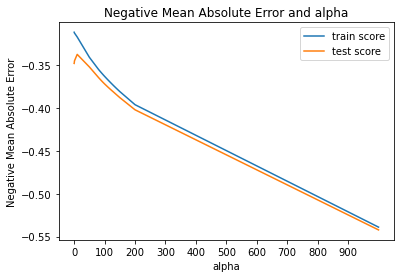

In [1997]:
plt.plot(results['param_alpha'],results['mean_train_score'])
plt.plot(results['param_alpha'],results['mean_test_score'])
plt.xticks(np.arange(0,1000,100))
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [1998]:
## Choosing alpha value to be 10 for moddelling 
ridge=Ridge(alpha=10,random_state=42)

In [1999]:
ridge=ridge.fit(X_train[top_50],y_train)

In [2000]:
y_train_pred=ridge.predict(X_train[top_50])

In [2001]:
## r2_score of train data
r2_score(y_train,y_train_pred)

0.7941327455997882

In [2002]:
## predict
y_test_pred=ridge.predict(X_test[top_50])

In [2003]:
## r2_score of test data
r2_score(y_test,y_test_pred)

0.7724448600265135

In [2004]:
### Mean squared error for ridge regression
mean_squared_error(y_test,y_test_pred)

0.23866238704399476

In [2005]:
summary_ridge=pd.DataFrame({'r2_score':[r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred)],'mean_sq_error':[mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred)]})

In [2006]:
summary_ridge.index=['Train', 'Test']
summary_ridge

,r2_score,mean_sq_error
Train,0.794133,0.205867
Test,0.772445,0.238662


In [2007]:
### Coeficients of predictor variables in ridge regression
pd.DataFrame({'Columns':X_train[top_50].columns,'Coefficients':ridge.coef_}).sort_values(by='Coefficients',ascending=False)

,Columns,Coefficients
48,GrLivArea,0.535140
0,SaleCondition_Partial,0.318770
37,BsmtCond_Gd,0.314731
33,Foundation_PConc,0.313254
39,BsmtExposure_Gd,0.302812
30,LandContour_Low,0.286857
38,BsmtCond_TA,0.281928
3,Condition1_Norm,0.236014
44,GarageQual_TA,0.233383
41,LandContour_HLS,0.233062


### Below are the features are the significant in determining the house price using ridge regression

In [2008]:
### Coeficients of predictor variables in ridge regression(TOP 10)
ridge_feature=pd.DataFrame({'Columns':X_train[top_50].columns,'Coefficients':ridge.coef_}).sort_values(by='Coefficients',ascending=False).head(10)
ridge_feature.reset_index(inplace=True)
ridge_feature.drop(columns='index',inplace=True)
ridge_var=ridge_feature
ridge_var

,Columns,Coefficients
0,GrLivArea,0.535140
1,SaleCondition_Partial,0.318770
2,BsmtCond_Gd,0.314731
3,Foundation_PConc,0.313254
4,BsmtExposure_Gd,0.302812
5,LandContour_Low,0.286857
6,BsmtCond_TA,0.281928
7,Condition1_Norm,0.236014
8,GarageQual_TA,0.233383
9,LandContour_HLS,0.233062


### LASSO REGULARISATION

In [2009]:
## Lasso regression
lasso=Lasso()

In [2010]:
### Hyperparameter tuning for alpha
grid=GridSearchCV(lasso,params,cv=4,n_jobs=-1,scoring='neg_mean_absolute_error',return_train_score=True)

In [2011]:
grid.fit(X_train[top_50],y_train)

GridSearchCV(cv=4, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.1, 0.2, 0.5, 0.8, 1, 10, 50, 80, 85,
                                   90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100,
                                   110, 120, 130, 140, 150, 200, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [2012]:
grid.best_estimator_

Lasso(alpha=0.001)

In [2013]:
results=pd.DataFrame(grid.cv_results_)

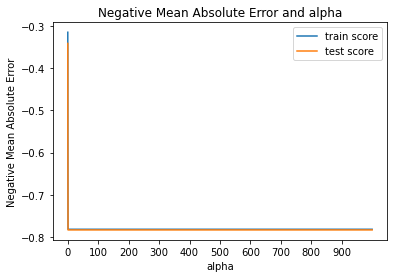

In [2014]:
##For lasso
plt.plot(results['param_alpha'],results['mean_train_score'])
plt.plot(results['param_alpha'],results['mean_test_score'])
plt.xticks(np.arange(0,1000,100))
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [2015]:
## Fitting lasso with alpha value of 0.001
lasso=Lasso(alpha=0.001,random_state=42)

In [2016]:
lasso=lasso.fit(X_train[top_50],y_train)

In [2017]:
y_train_pred=lasso.predict(X_train[top_50])

In [2018]:
## r2 score for train data
r2_score(y_train,y_train_pred)

0.7989404738281505

In [2019]:
y_test_pred=lasso.predict(X_test[top_50])

In [2020]:
## r2_score for test data
r2_score(y_test,y_test_pred)

0.77263220977864

In [2021]:
summary_lasso=pd.DataFrame({'r2_score':[r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred)],'mean_sq_error':[mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred)]})

In [2022]:
summary_lasso.index=['Train','Test']
summary_lasso

,r2_score,mean_sq_error
Train,0.798940,0.201060
Test,0.772632,0.238466


In [2023]:
lasso_coeff=pd.DataFrame({'Columns':X_train[top_50].columns,'Coeficients':lasso.coef_}).sort_values(by='Coeficients',ascending=False)

In [2024]:
## After feature elimination
lasso_coeff.loc[lasso_coeff['Coeficients']!=0.00]

,Columns,Coeficients
48,GrLivArea,0.533086
30,LandContour_Low,0.480259
37,BsmtCond_Gd,0.406935
41,LandContour_HLS,0.346731
38,BsmtCond_TA,0.330963
17,LandContour_Lvl,0.303191
0,SaleCondition_Partial,0.298782
39,BsmtExposure_Gd,0.286677
33,Foundation_PConc,0.268049
44,GarageQual_TA,0.235240


In [2025]:
lasso_coeff.head(10)
lasso_coeff.reset_index(inplace=True)
lasso_coeff.drop(columns='index',inplace=True)
lasso_var=lasso_coeff.head(10)

In [2026]:
### Overall features of both the models
feature_col=pd.DataFrame({'Columns':X_train[top_50].columns,'Coefficients_ridge':ridge.coef_,'Coefficients_lasso':lasso.coef_})

In [2027]:
### After feature elimination using lasso regulariation
feature_col.loc[feature_col['Coefficients_lasso']!=0.00]['Columns']

0     SaleCondition_Partial
1          Condition2_Other
2          Condition1_Other
3           Condition1_Norm
5              Heating_GasA
9      Neighborhood_Edwards
14            LotConfig_FR2
15        LotConfig_CulDSac
17          LandContour_Lvl
18         BsmtFinType2_Unf
19         BsmtFinType1_Unf
20         BsmtFinType1_Rec
21       BsmtFinType1_Other
22        Exterior2nd_Other
24             ExterCond_Fa
25             ExterCond_Gd
26      Exterior1st_HdBoard
27           RoofMatl_Other
30          LandContour_Low
31            RoofStyle_Hip
32          RoofStyle_Gable
33         Foundation_PConc
34              BsmtQual_Gd
35           BsmtQual_Other
36              BsmtQual_TA
37              BsmtCond_Gd
38              BsmtCond_TA
39          BsmtExposure_Gd
40        Foundation_CBlock
41          LandContour_HLS
42             HeatingQC_Fa
43             LotShape_IR3
44            GarageQual_TA
45     GarageCond_No Garage
46             PavedDrive_P
47               Fen

### Below is the summary coeficients of both ridge and lasso

In [2028]:
### Overall features of both the models
feature_col=pd.DataFrame({'Columns':X_train[top_50].columns,'Coefficients_ridge':ridge.coef_,'Coefficients_lasso':lasso.coef_})

In [2029]:
feature_col

,Columns,Coefficients_ridge,Coefficients_lasso
0,SaleCondition_Partial,0.318770,0.298782
1,Condition2_Other,-0.129854,-0.133747
2,Condition1_Other,0.070176,0.061034
3,Condition1_Norm,0.236014,0.221356
4,Condition1_Feedr,-0.001095,0.000000
5,Heating_GasA,0.085678,0.047446
6,Heating_GasW,0.016735,0.000000
7,Heating_Grav,0.014485,0.000000
8,Heating_OthW,-0.015285,-0.000000
9,Neighborhood_Edwards,-0.348535,-0.363358


### Important features of RIDGE

In [2030]:
### Top 10 ridge features
ridge_var

,Columns,Coefficients
0,GrLivArea,0.535140
1,SaleCondition_Partial,0.318770
2,BsmtCond_Gd,0.314731
3,Foundation_PConc,0.313254
4,BsmtExposure_Gd,0.302812
5,LandContour_Low,0.286857
6,BsmtCond_TA,0.281928
7,Condition1_Norm,0.236014
8,GarageQual_TA,0.233383
9,LandContour_HLS,0.233062


### Important features of LASSO

In [2031]:
## Top 10 lasso features
lasso_var

,Columns,Coeficients
0,GrLivArea,0.533086
1,LandContour_Low,0.480259
2,BsmtCond_Gd,0.406935
3,LandContour_HLS,0.346731
4,BsmtCond_TA,0.330963
5,LandContour_Lvl,0.303191
6,SaleCondition_Partial,0.298782
7,BsmtExposure_Gd,0.286677
8,Foundation_PConc,0.268049
9,GarageQual_TA,0.235240


- For both ridge and lasso regularization the feature importance seem to be similar in predicting the sale price of the house
- The above specified features play a important role in prediction
- For ridge the optimal alpha value turns out to be 10
- For Lasso the optimal alpha value is 0.001

## SUBJECTIVE QUESTIONS

- Q:1 Doubling the value of alpha and identifying the features

- RIDGE Optimal alpha :10

In [2032]:
### Doubling alpha value
ridge=Ridge(alpha=20,random_state=42)

In [2033]:
ridge.fit(X_train[top_50],y_train)

Ridge(alpha=20, random_state=42)

In [2034]:
y_train_pred=ridge.predict(X_train[top_50])

In [2035]:
## Accuracy of train data
r2_score(y_train,y_train_pred)

0.7870702032883636

In [2036]:
y_test_pred=ridge.predict(X_test[top_50])

In [2037]:
## Accuracy of test data
r2_score(y_test,y_test_pred)

0.7697092203031667

In [2038]:
summary_ridge_new=pd.DataFrame({'r2_score':[r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred)],'mean_sq_error':[mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred)]})

In [2039]:
summary_ridge_new.index=['Train','Test']

In [2040]:
### Original ridge with alpha-10
summary_ridge

,r2_score,mean_sq_error
Train,0.794133,0.205867
Test,0.772445,0.238662


In [2041]:
### After doubling the alpha=20 for ridge 
summary_ridge_new

,r2_score,mean_sq_error
Train,0.787070,0.212930
Test,0.769709,0.241532


### Top predicters after doubling the alpha for ridge

In [2042]:
### Coeficients of predictor variables in ridge regression(TOP 10)
ridge_feature=pd.DataFrame({'Columns':X_train[top_50].columns,'Coefficients':ridge.coef_}).sort_values(by='Coefficients',ascending=False).head(10)
ridge_feature.reset_index(inplace=True)
ridge_feature.drop(columns='index',inplace=True)
ridge_var_new=ridge_feature
ridge_var_new

,Columns,Coefficients
0,GrLivArea,0.535115
1,Foundation_PConc,0.323051
2,SaleCondition_Partial,0.309705
3,BsmtExposure_Gd,0.295271
4,BsmtCond_Gd,0.243171
5,BsmtCond_TA,0.241868
6,GarageQual_TA,0.232685
7,Condition1_Norm,0.213180
8,LandContour_Low,0.189102
9,LotConfig_CulDSac,0.184929


- Lasso - Optimal alpha=0.001

In [2043]:
### After doubling alpha value value for lasso
lasso=Lasso(alpha=0.002,random_state=42)

In [2044]:
lasso.fit(X_train[top_50],y_train)

Lasso(alpha=0.002, random_state=42)

In [2045]:
lasso_train_pred=lasso.predict(X_train[top_50])

In [2046]:
### accuracy of train data
r2_score(y_train,lasso_train_pred)

0.7956486939961032

In [2047]:
lasso_test_pred=lasso.predict(X_test[top_50])

In [2048]:
### Accuracy of test data
r2_score(y_test,lasso_test_pred)

0.7731394000898109

In [2049]:
summary_lasso_new=pd.DataFrame({'r2_score':[r2_score(y_train,lasso_train_pred),r2_score(y_test,lasso_test_pred)],'mean_sq_error':[mean_squared_error(y_train,lasso_train_pred),mean_squared_error(y_test,lasso_test_pred)]})

In [2050]:
summary_lasso_new.index=['Train','Test']

In [2051]:
## r2 score after doubling alpha=0.002
summary_lasso_new

,r2_score,mean_sq_error
Train,0.795649,0.204351
Test,0.773139,0.237934


In [2052]:
## r2 score when alpha=0.001
summary_lasso

,r2_score,mean_sq_error
Train,0.798940,0.201060
Test,0.772632,0.238466


### Top predicters after doubling the alpha for lasso

In [2053]:
lasso_coeff=pd.DataFrame({'Columns':X_train[top_50].columns,'Coeficients':lasso.coef_}).sort_values(by='Coeficients',ascending=False)

In [2054]:
lasso_coeff.head(10)
lasso_coeff.reset_index(inplace=True)
lasso_coeff.drop(columns='index',inplace=True)
lasso_var_new=lasso_coeff.head(10)
### Top 10 predictictors after doubling lasso alpha=0.002
lasso_var_new

,Columns,Coeficients
0,GrLivArea,0.531937
1,LandContour_Low,0.362679
2,BsmtCond_Gd,0.350727
3,SaleCondition_Partial,0.304862
4,BsmtCond_TA,0.302738
5,BsmtExposure_Gd,0.287162
6,Foundation_PConc,0.277776
7,LandContour_HLS,0.254484
8,LandContour_Lvl,0.241549
9,GarageQual_TA,0.236985


- Q3 Removing 5 most important predictors in lass0

#### Top 5 features for lasso
- GrLivArea
- LandContour_Low
- BsmtCond_Gd
- LandContour_HLS
- BsmtCond_TA

In [2055]:
### Removing the 5 features
new_features=set(top_50)-set({'GrLivArea','LandContour_Low','BsmtCond_Gd','LandContour_HLS','BsmtCond_TA'})

In [2056]:
len(new_features)

45

In [2057]:
## Using alpha=0.001
lasso=Lasso(alpha=0.001,random_state=42)

In [2058]:
## Fit the model
lasso.fit(X_train[new_features],y_train)

Lasso(alpha=0.001, random_state=42)

In [2059]:
y_train_pred=lasso.predict(X_train[new_features])
r2_score(y_train,y_train_pred)

0.587599038970342

In [2060]:
y_test_pred=lasso.predict(X_test[new_features])
r2_score(y_test,y_test_pred)

0.5960699804707122

### Top features after eliminating the original top features

In [2061]:
lasso_coeff=pd.DataFrame({'Columns':X_train[new_features].columns,'Coeficients':lasso.coef_}).sort_values(by='Coeficients',ascending=False)

In [2062]:
### Top 10 features
lasso_coeff.head(10)
lasso_coeff.reset_index(inplace=True)
lasso_coeff.drop(columns='index',inplace=True)
lasso_var_new=lasso_coeff.head(10)
lasso_var_new

,Columns,Coeficients
0,Foundation_PConc,0.401249
1,BsmtExposure_Gd,0.397379
2,Heating_GasW,0.274898
3,LotConfig_CulDSac,0.267007
4,Heating_GasA,0.229863
5,SaleCondition_Partial,0.228615
6,GarageQual_TA,0.142278
7,Condition1_Other,0.121106
8,Condition1_Norm,0.119219
9,Condition1_Feedr,0.085525


In [2063]:
### New features top 5 for lasso after rearranging columns
lasso_var_new.head()

,Columns,Coeficients
0,Foundation_PConc,0.401249
1,BsmtExposure_Gd,0.397379
2,Heating_GasW,0.274898
3,LotConfig_CulDSac,0.267007
4,Heating_GasA,0.229863


#### Top 5 new predictors for lasso
- Foundation_PConc
- BsmtExposure_Gd
- Heating_GasW
- LotConfig_CulDSac
- Heating_GasA